In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from plotnine import ggplot, aes, geom_bar, geom_point #datavis library

In [2]:
df = pd.read_csv('Data/complete_fire.csv')

In [3]:
df.isnull().sum()

unique_fire_identifier        0
lattitude                     0
longitude                     0
acres_burned                  0
fire_cause                    0
incident_name                 0
IsFSAssisted                  0
origin_county                 0
state                         0
year                          0
month                         0
value                     40987
anomaly                   40987
area (acres)              39756
population                39756
d0                        34889
d1                        34889
d2                        34889
d3                        34889
d4                        34889
DSCI_avg                  34889
DSCI_summed               34889
precipitation(in)         42654
dtype: int64

In [4]:
#Load libraries
import os

In [5]:
from sklearn.impute import KNNImputer

In [6]:
imp = KNNImputer(n_neighbors = 5)

In [4]:
df2 = df.dropna()

In [ ]:
#sns.pairplot(df2) # i think this is kind of unreadable

In [ ]:
corr = df2.corr()[['acres_burned']].sort_values('acres_burned' ,ascending =False) 

In [ ]:
plt.figure(figsize = (30, 30))
sns.heatmap(corr, annot =True, cmap = 'winter', vmin=-1, vmax =1);
plt.title('corr plot'); #heatmap

In [ ]:
plt.hist(df2['year'], bins = 6);

In [ ]:
plt.hist(df2['precipitation(in)']);

In [ ]:
plt.hist(df2['value']);

In [ ]:
plt.hist(df2['anomaly']);

In [ ]:
plt.hist(df2['month'], bins = 12);

In [ ]:
plt.hist(df2['population']);

In [ ]:
df['state'].value_counts()

In [5]:
bins = [0, 0.2501, 9.901, 99.901, 299.01, 999.01, 4999.01, 9999.01, 49999.01, 99999.01]
group_names = ['A','B','C','D','E','F','G','H','I','J']


In [6]:
d = dict(enumerate(group_names, 1))

df2['class'] = np.vectorize(d.get)(np.digitize(df2['acres_burned'], bins))

C:\Users\dmarm\AppData\Local\Temp\ipykernel_13264\1920520338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df2.head()

In [ ]:
df2.info()

In [ ]:
df2['class'].value_counts()

In [17]:
baseline = 55304/167273
baseline

0.3306212000741303

In [ ]:
plt.figure(figsize = (50, 50))
ggplot(aes(x = 'state', fill = 'class'), data = df2) + geom_bar()

In [ ]:
plt.figure(figsize = (50, 50))
ggplot(aes(x = 'value', y= 'precipitation(in)', fill = 'class'), data = df2) + geom_point()

<Figure size 3600x3600 with 0 Axes>

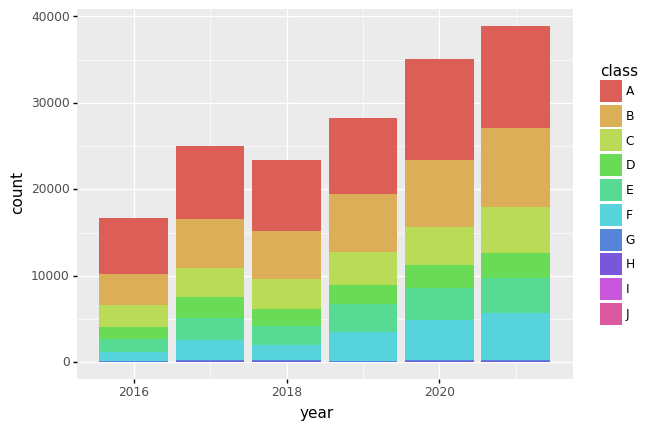

<ggplot: (132821197719)>

In [8]:
plt.figure(figsize = (50, 50))
ggplot(aes(x = 'year', fill = 'class'), data = df2) + geom_bar()

<Figure size 3600x3600 with 0 Axes>

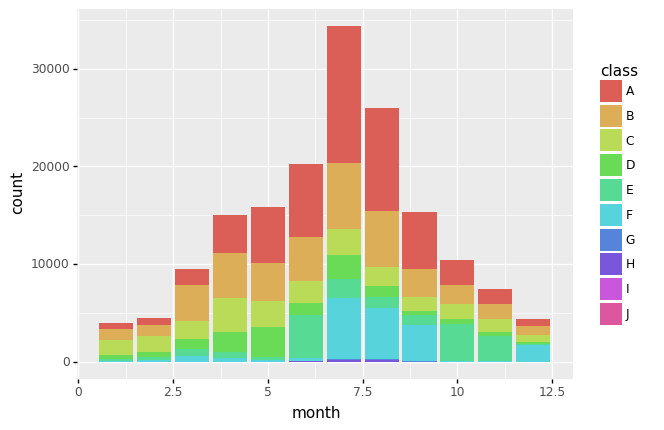

<ggplot: (132813311103)>

In [7]:
plt.figure(figsize = (50, 50))
ggplot(aes(x = 'month', fill = 'class'), data = df2) + geom_bar()

In [ ]:
df2['origin_county'].value_counts().head(15)

In [ ]:
df2['fire_cause'].value_counts()

In [ ]:
ca_fire = df2[df2["state"] == 'CA']

In [ ]:
corr2 = ca_fire.corr()[['acres_burned']].sort_values('acres_burned' ,ascending =False) 

In [ ]:
plt.figure(figsize = (30, 30))
sns.heatmap(corr2, annot =True, cmap = 'winter', vmin=-1, vmax =1);
plt.title('corr plot'); #heatmap

In [ ]:
la_county_fire = ca_fire[ca_fire["origin_county"] == 'Los Angeles']

In [ ]:
corr3 = la_county_fire.corr()[['acres_burned']].sort_values('acres_burned' ,ascending =False) 

In [ ]:
plt.figure(figsize = (30, 30))
sns.heatmap(corr3, annot =True, cmap = 'winter', vmin=-1, vmax =1);
plt.title('corr plot'); #heatmap

In [ ]:
plt.hist(la_county_fire['month'], bins = 12);

In [ ]:
plt.figure(figsize = (50, 50))
ggplot(aes(x = 'year', fill = 'class'), data = la_county_fire) + geom_bar()

In [ ]:
la_county_fire['class'].value_counts()

In [ ]:
big_fire = df2[df2["acres_burned"] > 99.9]

In [ ]:
big_fire['class'].value_counts()

In [ ]:
corr4 = big_fire.corr()[['acres_burned']].sort_values('acres_burned' ,ascending =False) 

In [ ]:
plt.figure(figsize = (30, 30))
sns.heatmap(corr4, annot =True, cmap = 'winter', vmin=-1, vmax =1);
plt.title('corr plot'); #heatmap

In [ ]:
plt.figure(figsize = (50, 50))
ggplot(aes(x = 'fire_cause', fill = 'class'), data = df2) + geom_bar()

In [ ]:
class_map = {
    'A' : 1,
    'B' : 2,
    'C' : 3, 
    'D' : 4, 
    'E' : 5, 
    'F' : 6, 
    'G' : 7, 
    'H' : 8, 
    'I' : 9, 
    'J' : 10
}

In [ ]:
df2['class'] = df2['class'].map(class_map)

In [ ]:
class_map = {
    1 : 0,
    2 : 1,
    3 : 2, 
    4 : 3, 
    5 : 4, 
    6 : 5, 
    7 : 6, 
    8 : 7, 
    9 : 8, 
    10 : 9
}

In [ ]:
df2['class'] = df2['class'].map(class_map)

In [ ]:
df2.head()

In [ ]:
df2.info()

In [6]:
X = df2[['precipitation(in)', 'value', 'anomaly', 'area (acres)', 'population', 'd0', 'd1', 'd2', 'd3', 'd4', 'DSCI_avg', 'DSCI_summed']]
y = df2['class']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [11]:
rf.score(X_train, y_train) 

0.6115787459945478

In [12]:
rf.score(X_test, y_test)

0.5958057342356345

In [13]:
gb = GradientBoostingClassifier(n_estimators = 10)
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=10)

In [14]:
gb.score(X_train, y_train) 

0.5432987389800246

In [15]:
gb.score(X_test, y_test)

0.5428632918051604

In [16]:
df2.to_csv('data.csv')